In [4]:
import pandas as pd
data = pd.read_csv("amazon2.csv",thousands=".",encoding="latin-1")

In [5]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,01/01/2012
6450,2013,Tocantins,Dezembro,85,01/01/2013
6451,2014,Tocantins,Dezembro,223,01/01/2014
6452,2015,Tocantins,Dezembro,373,01/01/2015


In [6]:
data.shape

(6454, 5)

In [7]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [8]:
data.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,01/01/1998
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [9]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [10]:
data = data[data["number"]!=0]

In [11]:
data.shape

(5837, 5)

In [54]:
forest_fire_per_month = data.groupby("month")["number"].sum()

In [55]:
forest_fire_per_month

month
Abril          28364
Agosto        740841
Dezembro      152596
Fevereiro      30952
Janeiro        52587
Julho         217620
Junho         111405
Maio           46083
Março          35118
Novembro      312326
Outubro       629665
Setembro     1015925
Name: number, dtype: int64

In [56]:
month_unique = list(data.month.unique())

In [57]:
month_unique

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [58]:
forest_fire_per_month.to_frame()

,number
month,
Abril,28364
Agosto,740841
Dezembro,152596
Fevereiro,30952
Janeiro,52587
Julho,217620
Junho,111405
Maio,46083
Março,35118


In [59]:
forest_fire_per_month= forest_fire_per_month.reindex(month_unique)

In [65]:
forest_fire_per_month= forest_fire_per_month.to_frame()

In [66]:
type(forest_fire_per_month)

pandas.core.frame.DataFrame

In [67]:
forest_fire_per_month.reset_index(level=0,inplace=True)

In [68]:
forest_fire_per_month

,month,number
0,Janeiro,52587
1,Fevereiro,30952
2,Março,35118
3,Abril,28364
4,Maio,46083
5,Junho,111405
6,Julho,217620
7,Agosto,740841
8,Setembro,1015925
9,Outubro,629665


In [46]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [69]:
import matplotlib.pyplot as plt

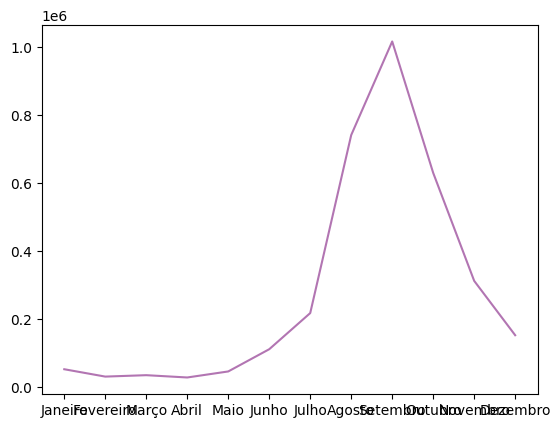

In [112]:
fig , axis = plt.subplots()
axis.plot(forest_fire_per_month["month"],forest_fire_per_month["number"],
color= (0.5,0.1,0.5,0.6))


In [108]:
import numpy as np

([<matplotlib.axis.XTick at 0x264a82c27d0>,
 [Text(0, 0, 'Janeiro'),
  Text(1, 0, 'Fevereiro'),
  Text(2, 0, 'Março'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Maio'),
  Text(5, 0, 'Junho'),
  Text(6, 0, 'Julho'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Setembro'),
  Text(9, 0, 'Outubro'),
  Text(10, 0, 'Novembro')])

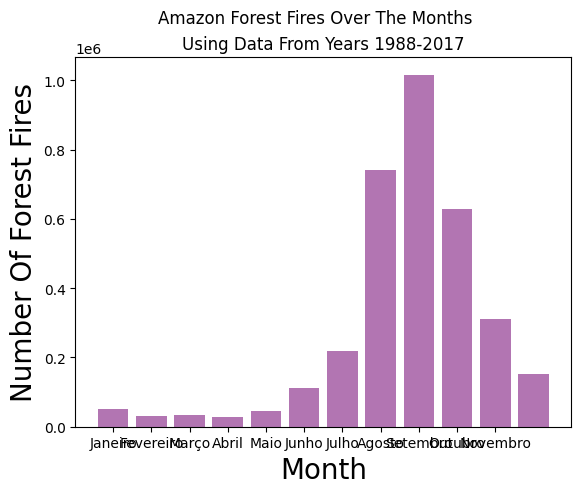

In [113]:
plt.bar(forest_fire_per_month["month"],forest_fire_per_month["number"],
color= (0.5,0.1,0.5,0.6))
plt.suptitle("Amazon Forest Fires Over The Months")
plt.title("Using Data From Years 1988-2017")
plt.xlabel("Month",fontsize=20)
plt.ylabel("Number Of Forest Fires",fontsize=20)
plt.xticks(np.arange(0,11,step=1),minor=False)
